In [1]:
import seaborn as sn
import matplotlib.pyplot as pp
import pandas as pd
import numpy as np
from IPython.display import set_matplotlib_formats
pp.rcParams['font.family'] = 'monospace'
pp.rcParams['font.weight'] = 'bold'
set_matplotlib_formats('svg')
sn.set_style('whitegrid')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.mode.chained_assignment = None

In [2]:
# Load the data
df = pd.read_json("result.json")

In [3]:
def get_unique(coll_df):
    unique_dict = set()
    for entry in coll_df:
        tempSet = entry.keys()
        unique_dict |= tempSet
    return unique_dict

#def get_present(coll_df):
#    unique_dict = set(coll_df[0].keys())
#    for entry in coll_df[1:]:
#        tempSet = entry.keys()
#        unique_dict &= tempSet
#    return unique_dict
#
#def get_types(coll_df, key):
#    unique_dict = set()
#    for entry in coll_df:
#        if key in entry.keys():
#            msgType = entry[key]
#            unique_dict.add(msgType)
#    return unique_dict

In [4]:
# all_keys = get_unique(df['messages'])
# common_keys = get_present(df['messages'])
# types = get_types2(df['messages'])

# typesToFind = (all_keys - common_keys) - {'edited', 'height', 'width', 'forwarded_from', 'via_bot', 'duration_seconds', 'reply_to_message_id', 'thumbnail', 'file', 'photo'}
# typesToFind = dict.fromkeys(typesToFind, 0)
# for thing in typesToFind:
#     typesToFind[thing] = get_types(df['messages'], thing)
# typesToFind
# len(all_keys)

In [5]:
all_keys = get_unique(df['messages'])
for key in all_keys:
    df[key] = df['messages'].apply(lambda msg: msg[key] if key in msg else np.nan)

In [6]:
print(df.columns)
all_keys
df.head()

Index(['name', 'type', 'id', 'messages', 'edited', 'message_id', 'action',
       'photo', 'media_type', 'from', 'date', 'duration_seconds', 'actor',
       'actor_id', 'sticker_emoji', 'thumbnail', 'forwarded_from', 'text',
       'file', 'height', 'mime_type', 'reply_to_message_id', 'width',
       'via_bot', 'from_id'],
      dtype='object')


,name,type,id,messages,edited,message_id,action,photo,media_type,from,date,duration_seconds,actor,actor_id,sticker_emoji,thumbnail,forwarded_from,text,file,height,mime_type,reply_to_message_id,width,via_bot,from_id
0,Hunny Bun ❤️🐰,message,1,"{'id': 1, 'type': 'message', 'date': '2019-09-...",NaN,NaN,NaN,NaN,sticker,Hunny Bun ❤️🐰,2019-09-05T19:51:50,NaN,NaN,NaN,🙃,(File not included. Change data exporting sett...,NaN,,(File not included. Change data exporting sett...,512.0,NaN,NaN,512.0,NaN,5.059293e+09
1,Hunny Bun ❤️🐰,message,329,"{'id': 329, 'type': 'message', 'date': '2019-0...",NaN,NaN,NaN,NaN,NaN,Hunny Bun ❤️🐰,2019-09-06T17:07:20,NaN,NaN,NaN,NaN,NaN,NaN,hey,NaN,NaN,NaN,NaN,NaN,NaN,5.059293e+09
2,Hunny Bun ❤️🐰,message,330,"{'id': 330, 'type': 'message', 'date': '2019-0...",NaN,NaN,NaN,NaN,sticker,Hunny Bun ❤️🐰,2019-09-06T17:07:22,NaN,NaN,NaN,🙃,(File not included. Change data exporting sett...,NaN,,(File not included. Change data exporting sett...,512.0,NaN,NaN,512.0,NaN,5.059293e+09
3,Hunny Bun ❤️🐰,message,331,"{'id': 331, 'type': 'message', 'date': '2019-0...",NaN,NaN,NaN,NaN,NaN,Hunny Bun ❤️🐰,2019-09-06T17:07:26,NaN,NaN,NaN,NaN,NaN,NaN,are u in ur dorm,NaN,NaN,NaN,NaN,NaN,NaN,5.059293e+09
4,Hunny Bun ❤️🐰,message,332,"{'id': 332, 'type': 'message', 'date': '2019-0...",NaN,NaN,NaN,NaN,NaN,Zaverose 🦌,2019-09-06T17:07:30,NaN,NaN,NaN,NaN,NaN,NaN,No I wish,NaN,NaN,NaN,NaN,NaN,NaN,5.231857e+09


In [7]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.fillna(value={'media_type' : 'text'}, inplace=True)
df.head()

,name,type,id,messages,edited,message_id,action,photo,media_type,from,duration_seconds,actor,actor_id,sticker_emoji,thumbnail,forwarded_from,text,file,height,mime_type,reply_to_message_id,width,via_bot,from_id
date,,,,,,,,,,,,,,,,,,,,,,,,
2019-09-05 19:51:50,Hunny Bun ❤️🐰,message,1,"{'id': 1, 'type': 'message', 'date': '2019-09-...",NaN,NaN,NaN,NaN,sticker,Hunny Bun ❤️🐰,NaN,NaN,NaN,🙃,(File not included. Change data exporting sett...,NaN,,(File not included. Change data exporting sett...,512.0,NaN,NaN,512.0,NaN,5.059293e+09
2019-09-06 17:07:20,Hunny Bun ❤️🐰,message,329,"{'id': 329, 'type': 'message', 'date': '2019-0...",NaN,NaN,NaN,NaN,text,Hunny Bun ❤️🐰,NaN,NaN,NaN,NaN,NaN,NaN,hey,NaN,NaN,NaN,NaN,NaN,NaN,5.059293e+09
2019-09-06 17:07:22,Hunny Bun ❤️🐰,message,330,"{'id': 330, 'type': 'message', 'date': '2019-0...",NaN,NaN,NaN,NaN,sticker,Hunny Bun ❤️🐰,NaN,NaN,NaN,🙃,(File not included. Change data exporting sett...,NaN,,(File not included. Change data exporting sett...,512.0,NaN,NaN,512.0,NaN,5.059293e+09
2019-09-06 17:07:26,Hunny Bun ❤️🐰,message,331,"{'id': 331, 'type': 'message', 'date': '2019-0...",NaN,NaN,NaN,NaN,text,Hunny Bun ❤️🐰,NaN,NaN,NaN,NaN,NaN,NaN,are u in ur dorm,NaN,NaN,NaN,NaN,NaN,NaN,5.059293e+09
2019-09-06 17:07:30,Hunny Bun ❤️🐰,message,332,"{'id': 332, 'type': 'message', 'date': '2019-0...",NaN,NaN,NaN,NaN,text,Zaverose 🦌,NaN,NaN,NaN,NaN,NaN,NaN,No I wish,NaN,NaN,NaN,NaN,NaN,NaN,5.231857e+09


In [8]:
BEN_ID = 5059293144
LIAM_ID = 5231857300

IDs = [LIAM_ID, BEN_ID]

liamMSGs = df[df['from_id'] == LIAM_ID]
benMSGs = df[df['from_id'] == BEN_ID]

#liamMSGs.shape[0], benMSGs.shape[0]
print(liamMSGs.shape[0], benMSGs.shape[0])
msgSum = df.groupby(by=['media_type', 'from_id'], dropna=False).agg('count')

53051 64409


## Messages Analysis and Visualization

4016 3745
48913 60467
29 55
43 49
1 2
47 86
2 5


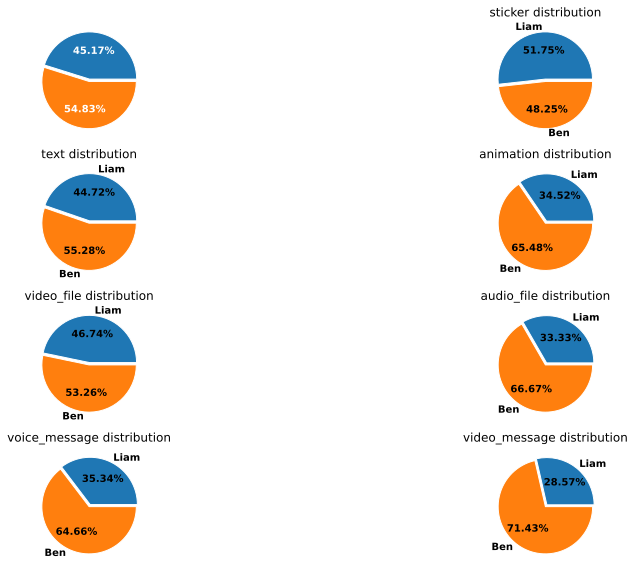

In [9]:
plt, ax = pp.subplots(4, 2, figsize=(15, 10))

ax[0][0].pie([liamMSGs.shape[0], benMSGs.shape[0]], explode=[0.05, 0], labels=['Liam', 'Ben'], textprops = {'color' : 'white'}, autopct='%1.2f%%')
ax[0][0].set_title('Total Message Distribution', **{'color': 'white'})

uniques = list(df['media_type'].unique())
uniques.insert(0, 0)
uniques = np.reshape(uniques, (4, 2))
for row in range(4):
    for col in range(2):
        if row == 0 and col == 0:
            continue
        else:
            liamCount, benCount = (msgSum.loc[uniques[row][col], LIAM_ID]['name'], msgSum.loc[uniques[row][col], BEN_ID]['name'])
            print(liamCount, benCount)
            ax[row][col].pie([liamCount, benCount], explode=[0.05, 0], labels=['Liam', 'Ben'], textprops = {'color' : 'black'}, autopct='%1.2f%%')
            ax[row][col].set_title(f'{uniques[row][col]} distribution', **{'color': 'black'})

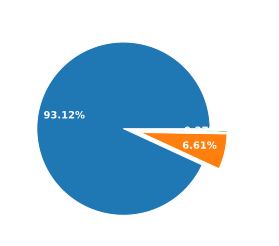

In [10]:
percentages = [msgSum.loc[unique]['name'].agg('sum') / df.shape[0] for unique in df['media_type'].unique()] 
percentages = [percentages[1], percentages[0], sum(percentages[2:])]
pp.pie(percentages, labels=['text', 'sticker', 'other'], explode = [0.1, 0.1, 0.1], textprops={'color' : 'white'}, autopct='%1.2f%%', pctdistance=.7, labeldistance=1.1)
pp.title('Message Type Distribution', **{'color': 'white'})
pp.show()

In [11]:
daily = df.groupby('from_id', dropna=False).resample('W').agg('count')
daily.head()

name  type   id  messages  edited  message_id  \
from_id      date                                                        
5.059293e+09 2019-09-08    46    46   46        46       2           0   
             2019-09-15   267   267  267       267       0           0   
             2019-09-22   193   193  193       193       2           0   
             2019-09-29   127   127  127       127       2           0   
             2019-10-06   221   221  221       221       4           0   

                         action  photo  media_type  from  duration_seconds  \
from_id      date                                                            
5.059293e+09 2019-09-08       0      2          46    46                 0   
             2019-09-15       0      2         267   267                 1   
             2019-09-22       0      1         193   193                 0   
             2019-09-29       0      0         127   127                 0   
             2019-10-06       0      6         221   221                 0   

                         actor  actor_id  sticker_emoji  thumbnail  \
from_id      date                                                    
5.059293e+09 2019-09-08      0         0              4          4   
             2019-09-15      0         0             19         20   
             2019-09-22      0         0             11         11   
             2019-09-29      0         0              3          3   
             2019-10-06      0         0              7          7   

                         forwarded_from  text  file  height  mime_type  \
from_id      date                                                        
5.059293e+09 2019-09-08               0    46     4       6          0   
             2019-09-15               0   267    20      22          1   
             2019-09-22               1   193    11      12          0   
             2019-09-29               0   127     3       3          0   
             2019-10-06               0   221     7      13          0   

                         reply_to_message_id  width  via_bot  from_id  
from_id      date                                                      
5.059293e+09 2019-09-08                    2      6        0       46  
             2019-09-15                   11     22        0      267  
             2019-09-22                   12     12        0      193  
             2019-09-29                    2      3        0      127  
             2019-10-06                    7     13        0      221

In [12]:
daily.drop('from_id', axis=1, inplace=True)

In [13]:
daily.reset_index(inplace=True)

In [14]:
daily.set_index('date', inplace=True)

In [15]:
daily.head()

,from_id,name,type,id,messages,edited,message_id,action,photo,media_type,from,duration_seconds,actor,actor_id,sticker_emoji,thumbnail,forwarded_from,text,file,height,mime_type,reply_to_message_id,width,via_bot
date,,,,,,,,,,,,,,,,,,,,,,,,
2019-09-08,5.059293e+09,46,46,46,46,2,0,0,2,46,46,0,0,0,4,4,0,46,4,6,0,2,6,0
2019-09-15,5.059293e+09,267,267,267,267,0,0,0,2,267,267,1,0,0,19,20,0,267,20,22,1,11,22,0
2019-09-22,5.059293e+09,193,193,193,193,2,0,0,1,193,193,0,0,0,11,11,1,193,11,12,0,12,12,0
2019-09-29,5.059293e+09,127,127,127,127,2,0,0,0,127,127,0,0,0,3,3,0,127,3,3,0,2,3,0
2019-10-06,5.059293e+09,221,221,221,221,4,0,0,6,221,221,0,0,0,7,7,0,221,7,13,0,7,13,0


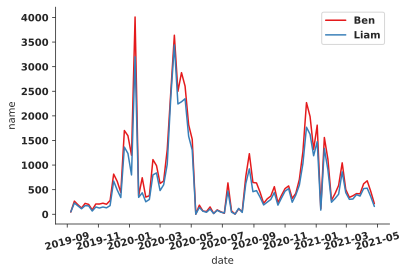

In [16]:
# ax = sn.lineplot(x='date', y='name', hue = 'from_id', data=daily)
# pp.xticks(rotation=15)
# pp.show()
sn.set_style('ticks')
sn.set_palette('colorblind')

palette = sn.color_palette('Set1', 2)
sn.lineplot(x='date', y='name', hue = 'from_id', palette=palette, data=daily)
pp.xticks(rotation=15)
pp.legend(['Ben', 'Liam'], loc='upper right')
sn.despine()
pp.show()

In [18]:
mediaSum = df.groupby(by=['media_type', 'from_id'], dropna=False).agg('count')
myDict = {LIAM_ID: 'Liam', BEN_ID: 'Ben'}
for media_type, from_id in mediaSum.index:
    agg = mediaSum.loc[media_type, from_id]['name']
    print(myDict[from_id], media_type, agg, sep='\t-\t')
    
print('\nTOTALS\n')
for media_type, from_id in mediaSum.index:
    agg = mediaSum.loc[media_type]['name'].agg('sum')
    print(media_type, agg, sep='\t-\t')

Ben	-	animation	-	55
Liam	-	animation	-	29
Ben	-	audio_file	-	2
Liam	-	audio_file	-	1
Ben	-	sticker	-	3745
Liam	-	sticker	-	4016
Ben	-	text	-	60467
Liam	-	text	-	48913


KeyError: nan

In [22]:
emojiSum = df.groupby('sticker_emoji').agg('count')
emojiSum.sort_values(by='name', inplace=True, ascending=False)
total = emojiSum['name'].agg('sum')
emojiSum['prop'] = emojiSum['name'] / total
emojiSum[0:10]

,name,type,id,messages,edited,message_id,action,photo,media_type,from,duration_seconds,actor,actor_id,thumbnail,forwarded_from,text,file,height,mime_type,reply_to_message_id,width,via_bot,from_id,prop
sticker_emoji,,,,,,,,,,,,,,,,,,,,,,,,
👅,624,624,624,624,0,0,0,0,624,624,0,0,0,624,0,624,624,624,0,222,624,0,624,0.080495
😭,495,495,495,495,0,0,0,0,495,495,0,0,0,495,0,495,495,495,0,196,495,0,495,0.063854
💤,414,414,414,414,0,0,0,0,414,414,0,0,0,414,1,414,414,414,0,92,414,0,414,0.053406
😳,381,381,381,381,0,0,0,0,381,381,0,0,0,381,2,381,381,381,0,261,381,0,381,0.049149
🤗,315,315,315,315,0,0,0,0,315,315,0,0,0,315,0,315,315,315,0,151,315,0,315,0.040635
🍑,296,296,296,296,0,0,0,0,296,296,0,0,0,296,0,296,296,296,0,164,296,0,296,0.038184
😐,275,275,275,275,0,0,0,0,275,275,0,0,0,275,0,275,275,275,0,170,275,0,275,0.035475
💦,271,271,271,271,0,0,0,0,271,271,0,0,0,271,1,271,271,271,0,133,271,0,271,0.034959
🥺,269,269,269,269,0,0,0,0,269,269,0,0,0,269,0,269,269,269,0,90,269,0,269,0.034701


In [23]:
emojiSum.index

Index(['👅', '😭', '💤', '😳', '🤗', '🍑', '😐', '💦', '🥺', '😘',
       ...
       '🍦', '🙀', '🍈', '🍏', '😼', '💖', '🍖', '🍗', '🍞', '🍣'],
      dtype='object', name='sticker_emoji', length=299)

[624, 495, 414, 381, 315, 296, 275, 271, 269, 222, 4004] ['👅', '😭', '💤', '😳', '🤗', '🍑', '😐', '💦', '🥺', '😘', 'other']


([<matplotlib.patches.Wedge at 0x7f41d247d1d0>,
 [Text(1.0632829375881307, 0.2818322100718007, '👅'),
  Text(0.8242698412974262, 0.728408696219036, '😭'),
  Text(0.49780177088624933, 0.9809145716638704, '💤'),
  Text(0.15296983949720155, 1.0893118140386622, '😳'),
  Text(-0.16381741357855492, 1.0877333565761569, '🤗'),
  Text(-0.4315834056262892, 1.011798282261842, '🍑'),
  Text(-0.6571593537730215, 0.8821233381725171, '😐'),
  Text(-0.8386229105582486, 0.7118367887983958, '💦'),
  Text(-0.9759051664059692, 0.5075520723848321, '🥺'),
  Text(-1.0584555415674994, 0.29945261148477537, '😘'),
  Text(-0.10079963573916974, -1.095371824283814, 'other')],
 [Text(0.5799725114117076, 0.15372666003916402, '8.25%'),
  Text(0.44960173161677786, 0.39731383430129236, '6.54%'),
  Text(0.27152823866522685, 0.5350443118166566, '5.47%'),
  Text(0.08343809427120083, 0.5941700803847247, '5.04%'),
  Text(-0.08935495286102996, 0.5933091035869946, '4.16%'),
  Text(-0.23540913034161226, 0.5518899721428229, '3.91%'),
  T

/opt/tljh/user/lib/python3.7/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 128069 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/opt/tljh/user/lib/python3.7/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 128164 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/opt/tljh/user/lib/python3.7/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 129303 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/opt/tljh/user/lib/python3.7/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 127825 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/opt/tljh/user/lib/python3.7/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 128166 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/opt/tljh/user/lib/python3.7/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 129402 missing from current font.
  font.se

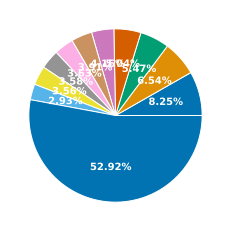

In [24]:
countList = list(emojiSum['name'])[:10]
countList.append(sum(list(emojiSum['name'])[11:]))
emojiList = list(emojiSum.index)[:10]
emojiList.append('other')
print(countList, emojiList)
pp.pie(countList, labels=emojiList, textprops = {'color' : 'white'}, autopct='%1.2f%%')

In [25]:
stickerSum = df.groupby('file').agg('count')
stickerSum.sort_values(by='name', inplace=True, ascending=False)
stickTotal = emojiSum['name'].agg('sum')
stickerSum['prop'] = emojiSum['name'] / total
stickerSum[0:10]

,name,type,id,messages,edited,message_id,action,photo,media_type,from,duration_seconds,actor,actor_id,sticker_emoji,thumbnail,forwarded_from,text,height,mime_type,reply_to_message_id,width,via_bot,from_id,prop
file,,,,,,,,,,,,,,,,,,,,,,,,
(File not included. Change data exporting settings to download.),8130,8130,8130,8130,0,0,0,0,8130,8130,301,0,0,7752,7965,25,8130,7967,369,3736,7967,6,8130,NaN


In [26]:
df['Weekday'] = df.index.dayofweek

In [27]:
df['Weekday'].replace(to_replace=[0, 1, 2, 3, 4, 5, 6], value=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], inplace=True)
df.head(10)

,name,type,id,messages,edited,message_id,action,photo,media_type,from,duration_seconds,actor,actor_id,sticker_emoji,thumbnail,forwarded_from,text,file,height,mime_type,reply_to_message_id,width,via_bot,from_id,Weekday
date,,,,,,,,,,,,,,,,,,,,,,,,,
2019-09-05 19:51:50,Hunny Bun ❤️🐰,message,1,"{'id': 1, 'type': 'message', 'date': '2019-09-...",NaN,NaN,NaN,NaN,sticker,Hunny Bun ❤️🐰,NaN,NaN,NaN,🙃,(File not included. Change data exporting sett...,NaN,,(File not included. Change data exporting sett...,512.0,NaN,NaN,512.0,NaN,5.059293e+09,Wednesday
2019-09-06 17:07:20,Hunny Bun ❤️🐰,message,329,"{'id': 329, 'type': 'message', 'date': '2019-0...",NaN,NaN,NaN,NaN,text,Hunny Bun ❤️🐰,NaN,NaN,NaN,NaN,NaN,NaN,hey,NaN,NaN,NaN,NaN,NaN,NaN,5.059293e+09,Thursday
2019-09-06 17:07:22,Hunny Bun ❤️🐰,message,330,"{'id': 330, 'type': 'message', 'date': '2019-0...",NaN,NaN,NaN,NaN,sticker,Hunny Bun ❤️🐰,NaN,NaN,NaN,🙃,(File not included. Change data exporting sett...,NaN,,(File not included. Change data exporting sett...,512.0,NaN,NaN,512.0,NaN,5.059293e+09,Thursday
2019-09-06 17:07:26,Hunny Bun ❤️🐰,message,331,"{'id': 331, 'type': 'message', 'date': '2019-0...",NaN,NaN,NaN,NaN,text,Hunny Bun ❤️🐰,NaN,NaN,NaN,NaN,NaN,NaN,are u in ur dorm,NaN,NaN,NaN,NaN,NaN,NaN,5.059293e+09,Thursday
2019-09-06 17:07:30,Hunny Bun ❤️🐰,message,332,"{'id': 332, 'type': 'message', 'date': '2019-0...",NaN,NaN,NaN,NaN,text,Zaverose 🦌,NaN,NaN,NaN,NaN,NaN,NaN,No I wish,NaN,NaN,NaN,NaN,NaN,NaN,5.231857e+09,Thursday
2019-09-06 17:07:52,Hunny Bun ❤️🐰,message,333,"{'id': 333, 'type': 'message', 'date': '2019-0...",NaN,NaN,NaN,NaN,text,Hunny Bun ❤️🐰,NaN,NaN,NaN,NaN,NaN,NaN,rip,NaN,NaN,NaN,NaN,NaN,NaN,5.059293e+09,Thursday
2019-09-06 17:08:01,Hunny Bun ❤️🐰,message,334,"{'id': 334, 'type': 'message', 'date': '2019-0...",NaN,NaN,NaN,NaN,text,Zaverose 🦌,NaN,NaN,NaN,NaN,NaN,NaN,I agreed to play smash with Devin and Brysen,NaN,NaN,NaN,NaN,NaN,NaN,5.231857e+09,Thursday
2019-09-06 17:08:09,Hunny Bun ❤️🐰,message,335,"{'id': 335, 'type': 'message', 'date': '2019-0...",NaN,NaN,NaN,NaN,text,Zaverose 🦌,NaN,NaN,NaN,NaN,NaN,NaN,Am stuck in their room rn,NaN,NaN,NaN,NaN,NaN,NaN,5.231857e+09,Thursday
2019-09-06 17:08:14,Hunny Bun ❤️🐰,message,336,"{'id': 336, 'type': 'message', 'date': '2019-0...",NaN,NaN,NaN,NaN,text,Hunny Bun ❤️🐰,NaN,NaN,NaN,NaN,NaN,NaN,come see me before i have to go to sleep tho o...,NaN,NaN,NaN,NaN,NaN,NaN,5.059293e+09,Thursday


In [28]:
df['hour'] = df.index.hour

In [29]:
df['hour'] = df['hour'].apply(lambda x : str(x - 12) + ' PM' if x >= 12 else (str(x) + ' AM' if x != 0 else '12 AM'))

In [30]:
df['hour'] = df['hour'].apply(lambda x : '12 PM' if x == '0 PM' else x)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

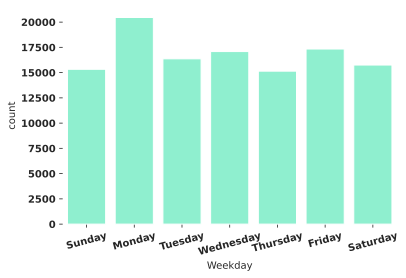

In [31]:
ax = sn.countplot(data=df, x='Weekday', color='aquamarine', order= ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
sn.despine(top=True, bottom=True, left=True, right=True)
pp.xticks(rotation=15)

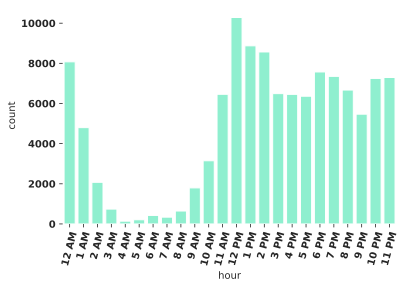

In [32]:
sn.countplot(data=df, x='hour', color='aquamarine', order=map(lambda x : f'{12} {x[len(x) - 2 :]}' if x[0] == '0' else x, map(lambda x : f'{x} AM' if x < 12 else f'{x - 12} PM', list(range(24)))))
pp.xticks(rotation=75)
sn.despine(top=True, bottom=True, left=True, right=True)

In [33]:
busiestWeekday = df[df['Weekday'] == 'Monday'].shape[0]
busiestWeekday

20455

In [34]:
busiestHour = df[df['hour'] == '12 PM'].shape[0]
busiestHour

10283

In [35]:
monthly = df.resample('M').agg('count')
weekly = df.resample('W').agg('count')
daily = df.resample('D').agg('count')
hourly = df.resample('H').agg('count')
minutely = df.resample('T').agg('count')
# secondly = df.resample('S').agg('count')
# daily.sort_values(by='name', inplace=True, ascending=False)
# daily.head(10)

In [36]:
# monthly
top5Months = monthly.sort_values(by='name', ascending=False).head()
avgPerMonth = round(monthly['name'].mean())
monthly['name'].describe()

count       20.000000
mean      5873.050000
std       5558.636585
min        569.000000
25%       2334.750000
50%       3830.500000
75%       7099.000000
max      20230.000000
Name: name, dtype: float64

In [37]:
# Weekly
top5Weekly = weekly.sort_values(by='name', ascending=False).head()
avgPerWeekly = round(weekly['name'].mean())
weekly['name'].describe()

count      86.000000
mean     1365.825581
std      1528.959517
min         5.000000
25%       372.250000
50%       805.500000
75%      1887.500000
max      7208.000000
Name: name, dtype: float64

In [38]:
# daily
top5Days = daily.sort_values(by='name', ascending=False).head()
avgPerDays = round(daily['name'].mean())
daily['name'].describe()

count     596.000000
mean      197.082215
std       275.314204
min         0.000000
25%        34.750000
50%        92.000000
75%       232.500000
max      2463.000000
Name: name, dtype: float64

In [39]:
# hourly
top5Hours = hourly.sort_values(by='name', ascending=False).head()
avgPerHours = round(hourly['name'].mean())
hourly['name'].describe()

count    14285.000000
mean         8.222681
std         29.439712
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        694.000000
Name: name, dtype: float64

In [40]:
# minutely
top5Minutes = minutely.sort_values(by='name', ascending=False).head()
avgPerMinutes = round(hourly['name'].mean())
minutely['name'].describe()

count    857026.000000
mean          0.137057
std           0.984818
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          32.000000
Name: name, dtype: float64

In [42]:
df['text_length'] = df.apply(lambda row: len(row['text']) if row['media_type'] == 'text' else np.nan, axis=1)

In [43]:
# df['words'] = df.apply(lambda row: row['text'].split() if row['media_type'] == 'text' else 0, axis=1)
import string
import re

def extractor(acc, lines):
    for line in lines:
        curr = line.split(' ')
        for word in curr:
            acc.append(word)

list(filter(lambda x: len(x) > 0, re.split(f'[{string.punctuation}{string.whitespace}]+', 'this is a test\ndoes this\t work?\n hopefully it does\n')))

['this', 'is', 'a', 'test', 'does', 'this', 'work', 'hopefully', 'it', 'does']

In [44]:
def filter_entry(entry):
    if type(entry) == dict:
        if entry['type'] != 'link':
            print(entry['type'])
            return entry['text']
        else:
            return ''
    else:
        return entry
    
def helper(row):
    if row['media_type'] == 'text':
        text = row['text']
        if type(text) == list:
            text = ''.join(list(map(lambda entry: filter_entry(entry), text)))
        row['text'] = text
        toRet = list(filter(lambda x: len(x) > 0, re.split(f'[{string.punctuation}{string.whitespace}]+', text)))
        return toRet
    else:
        return np.nan

# df['words'] = df.apply(lambda row: helper(row), axis=1)
uniques = df['mime_type'].unique()[1:]
dfTest = df[~df['mime_type'].isin(uniques)]
print(len(df), len(dfTest))

117461 117092


In [2]:
# df['words'] = df.apply(lambda row: helper(row), axis=1)

[[{'type': 'link', 'text': 'https://open.spotify.com/album/0cGGGHvqwMD2J7bNz8TG3s?si=bO8A4OMRSm-yk8YJ-cBCcA'}],
[{'type': 'link', 'text': 'https://open.spotify.com/album/6KOWjVP0mh5rOqmzm4tkPD?si=1cZNM8B4SB2_-UN8im6K6Q'}],
[{'type': 'link', 'text': 'https://t.me/hoursdumbmemeshit'}],
['ur gonna ', {'type': 'hashtag', 'text': '#die'}, ' tomorrow'],
['i just don’t know. i’m incredibly worried that i’m gonna wake up tomorrow and ur just gonna straight up be ', {'type': 'hashtag', 'text': '#dead'}, ' if u feel me'],
['I’ll send', {'type': 'strikethrough', 'text': ' '}, ' g o o d  v i b e s'],
[{'type': 'link', 'text': 'https://open.spotify.com/playlist/6x5saZ2gnWKQ2CTpHx6CBL?si=slNlQcKZQq-BVgXFnPQXkQ'}],
[{'type': 'link', 'text': 'https://open.spotify.com/track/1XXqmnOgL9k9lcRT3hncTf?si=GYjibR9YQemmAApL4lmArQ'}],
[{'type': 'link', 'text': 'https://www.forbes.com/sites/janetwburns/2017/05/21/std-verified-dating-app-is-startup-culture-via-nutshell-frank-unchecked-and-inevitable/#4cdc81741feb'}],
['also: ', {'type': 'link', 'text': 'https://bust.com/sex/192972-neatclub-sti-dating-app.html'}],
[{'type': 'link', 'text': 'https://www.nytimes.com/2017/09/29/health/chlamydia-syphilis-gonorrhea.html'}],
[{'type': 'link', 'text': 'http://www.ashasexualhealth.org/stdsstis/statistics/'}],
[{'type': 'link', 'text': 'https://www.webmd.com/genital-herpes/news/20120112/herpes-drugs-dont-stop-herpes-spread#1'}],
[{'type': 'mention', 'text': '@helloitsbwl'}],
[{'type': 'hashtag', 'text': '#justminnesotathings'}],
[{'type': 'hashtag', 'text': '#justcouplethings'}],
[{'type': 'hashtag', 'text': '#justgaycouplethings'}],
['o-|-<\no-|-<\no-|-<', {'type': 'italic', 'text': '\n__'}],
[{'type': 'mention', 'text': '@helloitsbwl'}],
[{'type': 'link', 'text': 'https://open.spotify.com/user/bwlohrman/playlist/3vHdHfoXATSBmuV5JuOF6b?si=mf7eOIzGT56GOpRAeCh0dg'}, '\n\nthis is a work in progress'],
[{'type': 'link', 'text': 'https://open.spotify.com/album/6tu6n9zKNQGSxtZGGnmUhu?si=IsfEg8WSQ0WBcWS615_NVg'}],
[{'type': 'link', 'text': 'https://t.me/garbagedumpp'}],
[{'type': 'link', 'text': 'https://t.me/rfurry_irl?utm_source=share&utm_medium=ios_app&utm_name=iossmf'}],
['Snap is “bpower782” and the number is ', {'type': 'phone', 'text': '952-666-9704'}, ', yes actually 666'],
[{'type': 'link', 'text': 'https://www.vox.com/2014/11/24/7272929/global-poverty-health-crime-literacy-good-news'}],
['this is because people can communicate instead of just outright ', {'type': 'bold', 'text': 'assume'}],
["lmao I'm not ", {'type': 'bold', 'text': 'that'}, ' go-with-the-flow but I can sorta relate'],
['I like to at least have ', {'type': 'bold', 'text': 'somewhat'}, ' of a plan and a end goal in mind'],
['because I Lion ', {'type': 'bold', 'text': 'needs'}, " to in order to survive and evolutionarily that's how it works"],
['My ~a d o r a b l e~', {'type': 'strikethrough', 'text': ' dumpster '}, 'buny'],
["Like I'll admit it may be ", {'type': 'bold', 'text': 'good'}],
['I bought you like a sweatshirt and another thing ', {'type': 'bold', 'text': "that I still don't know when it'll be here"}],
[{'type': 'link', 'text': 'https://twitter.com/0600Hours/status/1206737309825040385'}],
['I mean she looked through my old sketchbook that I ', {'type': 'bold', 'text': 'literally had stashed under my bed so that no one would go through it but she did anyway'}],
["that's me the ", {'type': 'bold', 'text': 'icon'}],
[{'type': 'bold', 'text': '***'}],
['you deserve absolute ', {'type': 'bold', 'text': 'bestest'}, ' feel'],
['Horny just means you', {'type': 'bold', 'text': ' want '}, 'sex'],
['How', {'type': 'bold', 'text': ' did '}, 'this happen'],
['I am', {'type': 'bold', 'text': ' sorry'}],
['Because I love', {'type': 'bold', 'text': ' you'}],
['I am now taking preorders for the Mahoney body pillow! 👀It costs $45, but the price will be $50 after preorders. Please fill out this form if you want to buy one! ', {'type': 'link', 'text': 'https://forms.gle/WUZbHGjcoKP1hVW59'}, ' \nI need at least 23 orders to make these a reality!\n\nShipping will be $5 for US and $15 internationally, but this is just an estimate. \n\nAlso, this is a preorder, so I will not charge you until they are finished being produced. ', {'type': 'bold', 'text': 'If the project is not successfully funded, you will not be charged.\n\n'}, 'Thanks so much for your support <3'],
[{'type': 'link', 'text': 'https://www.reddit.com/r/furry_irl/comments/et29dk/headline_irl/?utm_source=share&utm_medium=web2x'}],
['That’s', {'type': 'bold', 'text': ' way '}, 'too cute! Stop that!'],
[{'type': 'mention', 'text': '@benjammy'}],
[{'type': 'link', 'text': 'https://www.reddit.com/user/vanillacoldbrew'}],
['I am the most', {'type': 'bold', 'text': ' responsible '}, 'person out there'],
[{'type': 'link', 'text': 'https://www.reddit.com/r/furry/comments/ev2zf9/hugs_kisses_by_rettriverr/'}, '\n\nme @ u all the time'],
['Listen I am', {'type': 'bold', 'text': ' discrete '}, 'and cryptography math major'],
[{'type': 'link', 'text': 'https://open.spotify.com/playlist/0grSJhSlFfoPgffeyh4NHX?si=ZwyCzyBnR76-qsMDU9uBjg'}],
['I will not', {'type': 'bold', 'text': ' hush '}, 'my love for you'],
['You see we have the advantage of being able to be boned in the ass', {'type': 'bold', 'text': ' while '}, 'giving some awkward finger guns'],
['But the way we needed it to move just so happened to', {'type': 'bold', 'text': ' look '}, 'like we implemented one of the greatest balance-beam AIs written'],
[{'type': 'link', 'text': 'https://open.spotify.com/playlist/1JoGoG6CQiMgMdVEm0SDDr?si=uRqqLhLYTe-RGkxevavxVA'}],
['As if I’m honest the only times where I will explicitly', {'type': 'bold', 'text': ' prefer '}, 'she/her and female references is during sex when you’re being dommy and I’m feeling really subby']]

forwarded = df.dropna(subset=['forwarded_from'])
# print(len(forwarded))
# forwarded = forwarded[~forwarded['forwarded_from'].isin({'Hunny Bun ❤️🐰', 'Zaverose 🦌'})]
# print(len(forwarded))
# forwarded.head()
print(len(df))
noForwarded = df.drop(forwarded.index)
print(len(noForwarded))

NameError: name 'df' is not defined

In [1]:
noForwarded['words'] = noForwarded.apply(lambda row: helper(row), axis=1)

NameError: name 'noForwarded' is not defined

In [ ]:
noForwarded.head(5)

In [ ]:
noForwarded[['text_length', 'words']].describe()
noForwarded = noForwarded[noForwarded['media_type'] == 'text']
def temp(row):
    return len(row['words'])
noForwarded['num_words'] = noForwarded.apply(temp, axis=1)

In [ ]:
noForwarded[['text_length', 'num_words']].describe()
# noForwarded[noForwarded['num_words'] == 2048]